In [1]:
import json

# Data Manipulation
import pandas as pd

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
with open('../data/raw/modified_recipes_data.json') as json_file:
    data = json.load(json_file)

### Number of Recipes

In [4]:
len(data)

1029718

### Recipe Format Example

In [5]:
data[0]

{'ingredients': [{'text': '6 ounces penne'},
  {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
  {'text': '1 ounce Cheddar, grated (1/4 cup)'},
  {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
  {'text': '1/4 cup (1/2 stick) unsalted butter'},
  {'text': '1/3 cup all-purpose flour'},
  {'text': '3 cups milk'},
  {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
  {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
  {'text': '1/2 teaspoon kosher salt'},
  {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
  {'text': '1/8 teaspoon garlic powder'},
  {'text': '(makes about 4 cups)'}],
 'url': 'http://www.epicurious.com/recipes/food/views/-world-s-best-mac-and-cheese-387747',
 'partition': 'train',
 'title': 'Worlds Best Mac and Cheese',
 'id': '000018c8a5',
 'instructions': [{'text': 'Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.'},


### Ingredient and Instruction Stats

In [7]:
# ingredients data
num_ingredients_dist = [len(i['ingredients']) for i in data]
avg_num_ingredients = sum(num_ingredients_dist)/len(data)
max_num_ingredients = max(num_ingredients_dist)
min_num_ingredients = min(num_ingredients_dist)

# instructions data
num_instruction_steps_dist = [len(i['instructions']) for i in data]
avg_num_instruction_steps = sum(num_instruction_steps_dist)/len(data)
max_num_instruction_steps = max(num_instruction_steps_dist)
min_num_instruction_steps = min(num_instruction_steps_dist)



In [8]:
pd.DataFrame(num_ingredients_dist,columns = ['Number of Ingredients']).describe().round(2)

,Number of Ingredients
count,1029718.00
mean,9.33
std,4.31
min,0.00
25%,6.00
50%,9.00
75%,12.00
max,99.00


In [9]:
pd.DataFrame(num_instruction_steps_dist,columns = ['Number of Instruction Steps \n Descriptive Statistics']).describe().round(2)

,Number of Instruction Steps \n Descriptive Statistics
count,1029718.00
mean,10.32
std,6.78
min,0.00
25%,6.00
50%,9.00
75%,13.00
max,164.00


### Ingredient Count Distribution

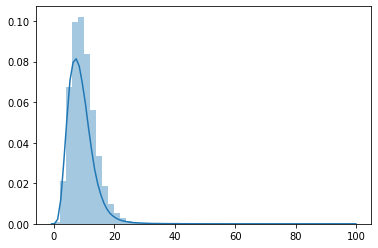

In [10]:
sns.distplot(num_ingredients_dist)

### Instructions Count Distribution

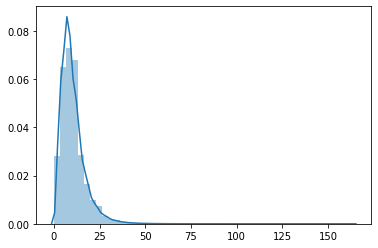

In [11]:
sns.distplot(num_instruction_steps_dist)

### Relationship Between Ingredient and Instruction Counts

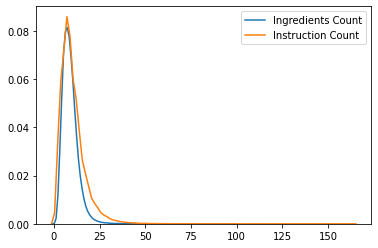

In [12]:
sns.kdeplot(num_ingredients_dist,label='Ingredients Count')
sns.kdeplot(num_instruction_steps_dist,label='Instruction Count')

plt.legend()

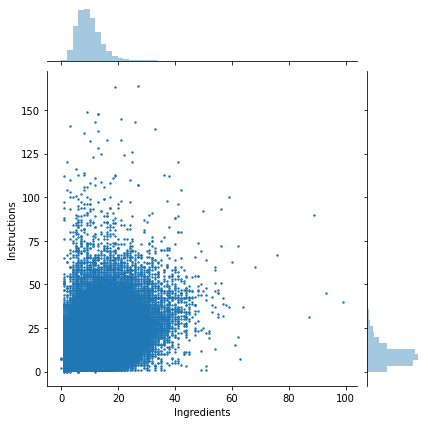

In [13]:
df = pd.DataFrame(list(zip(num_ingredients_dist,num_instruction_steps_dist)),columns = ['Ingredients','Instructions'])
sns.jointplot(x="Ingredients", y="Instructions", data=df,s=2);

### DataFrame View

In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,ingredients,url,partition,title,id,instructions
0,"[{'text': '6 ounces penne'}, {'text': '2 cups ...",http://www.epicurious.com/recipes/food/views/-...,train,Worlds Best Mac and Cheese,000018c8a5,[{'text': 'Preheat the oven to 350 F. Butter o...
1,"[{'text': '1 c. elbow macaroni'}, {'text': '1 ...",http://cookeatshare.com/recipes/dilly-macaroni...,train,Dilly Macaroni Salad Recipe,000033e39b,[{'text': 'Cook macaroni according to package ...
2,"[{'text': '8 tomatoes, quartered'}, {'text': '...",http://www.foodnetwork.com/recipes/gazpacho1.html,train,Gazpacho,000035f7ed,[{'text': 'Add the tomatoes to a food processo...
3,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",http://www.food.com/recipe/crunchy-onion-potat...,test,Crunchy Onion Potato Bake,00003a70b1,[{'text': 'Preheat oven to 350 degrees Fahrenh...
4,[{'text': '1 (3 ounce) package watermelon gela...,http://www.food.com/recipe/cool-n-easy-creamy-...,train,Cool 'n Easy Creamy Watermelon Pie,00004320bb,"[{'text': 'Dissolve Jello in boiling water.'},..."


In [16]:
df['ingredients'][0]

[{'text': '6 ounces penne'},
 {'text': '2 cups Beechers Flagship Cheese Sauce (recipe follows)'},
 {'text': '1 ounce Cheddar, grated (1/4 cup)'},
 {'text': '1 ounce Gruyere cheese, grated (1/4 cup)'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder (see Note)'},
 {'text': '1/4 cup (1/2 stick) unsalted butter'},
 {'text': '1/3 cup all-purpose flour'},
 {'text': '3 cups milk'},
 {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': '1/2 teaspoon kosher salt'},
 {'text': '1/4 to 1/2 teaspoon chipotle chili powder'},
 {'text': '1/8 teaspoon garlic powder'},
 {'text': '(makes about 4 cups)'}]

##### Fix Ingredient and Instruction Lists

In [17]:
for i,r in df.iterrows():
    _ingredients = [i['text'] for i in r['ingredients']]
    _instructions = [i['text'] for i in r['instructions']]
    df.at[i,'ingredients'] = _ingredients
    df.at[i,'instructions'] = _instructions

In [18]:
df[['id','title','ingredients','instructions','url','partition']].head()

,id,title,ingredients,instructions,url,partition
0,000018c8a5,Worlds Best Mac and Cheese,"[6 ounces penne, 2 cups Beechers Flagship Chee...",[Preheat the oven to 350 F. Butter or oil an 8...,http://www.epicurious.com/recipes/food/views/-...,train
1,000033e39b,Dilly Macaroni Salad Recipe,"[1 c. elbow macaroni, 1 c. cubed American chee...",[Cook macaroni according to package directions...,http://cookeatshare.com/recipes/dilly-macaroni...,train
2,000035f7ed,Gazpacho,"[8 tomatoes, quartered, Kosher salt, 1 red oni...",[Add the tomatoes to a food processor with a p...,http://www.foodnetwork.com/recipes/gazpacho1.html,train
3,00003a70b1,Crunchy Onion Potato Bake,"[2 12 cups milk, 1 12 cups water, 14 cup butte...","[Preheat oven to 350 degrees Fahrenheit., Spra...",http://www.food.com/recipe/crunchy-onion-potat...,test
4,00004320bb,Cool 'n Easy Creamy Watermelon Pie,"[1 (3 ounce) package watermelon gelatin, 14 cu...","[Dissolve Jello in boiling water., Allow to co...",http://www.food.com/recipe/cool-n-easy-creamy-...,train


In [64]:
# Write Dataframe - not advised since writing a list to a csv inteprets the list as a string
#df[['id','title','ingredients','instructions','url','partition']].to_csv('../../data/interim/recipes_1m_dataframe.csv',index=False)


### Remake JSON file to be more intuitive, reduces original file size by 15%

In [60]:
from functools import reduce
def reduced_recipe_dict(dat):
    return {
        dat['id']: {
            'title': dat['title'],
            'source_url': dat['url'],
            'ingredients': [ingredient['text'] for ingredient in dat['ingredients']],
            'instructions': [instruction['text'] for instruction in dat['instructions']]
        }
    }

json_data = reduce(
    lambda d1, d2: (d1.update(d2) or d1),
    map(reduced_recipe_dict, data),
    {}
)

In [63]:
json_data['000018c8a5']

{'title': 'Worlds Best Mac and Cheese',
 'source_url': 'http://www.epicurious.com/recipes/food/views/-world-s-best-mac-and-cheese-387747',
 'ingredients': ['6 ounces penne',
  '2 cups Beechers Flagship Cheese Sauce (recipe follows)',
  '1 ounce Cheddar, grated (1/4 cup)',
  '1 ounce Gruyere cheese, grated (1/4 cup)',
  '1/4 to 1/2 teaspoon chipotle chili powder (see Note)',
  '1/4 cup (1/2 stick) unsalted butter',
  '1/3 cup all-purpose flour',
  '3 cups milk',
  '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)',
  '2 ounces semisoft cheese (page 23), grated (1/2 cup)',
  '1/2 teaspoon kosher salt',
  '1/4 to 1/2 teaspoon chipotle chili powder',
  '1/8 teaspoon garlic powder',
  '(makes about 4 cups)'],
 'instructions': ['Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.',
  'Cook the penne 2 minutes less than package directions.',
  '(It will finish cooking in the oven.)',
  'Rinse the pasta in cold water and set aside.',
  'Combine the cooked pasta and th

In [61]:
len(json_data)

1029718

In [66]:

with open('../data/interim/recipes_1m_json_cleaned.json', 'w') as fp:
    json.dump(json_data, fp)

### Write DataFrame

In [50]:
#df[['id','title','ingredients','instructions','url','partition']].to_csv('../../data/interim/recipes_1m_dataframe.csv',index=False)


### Which Sites Contributed the Most to the Recipe List?

In [41]:
sites = []
for i,r in df.iterrows():
    sites.append(r['url'].split('/')[2])

In [73]:
from collections import Counter
sorted_recipe_source_counts = sorted(Counter(sites).items(),key = lambda x:x[1], reverse=True)
recipe_source_df = pd.DataFrame(sorted_recipe_source_counts,columns = ['Recipe Source','Count'])


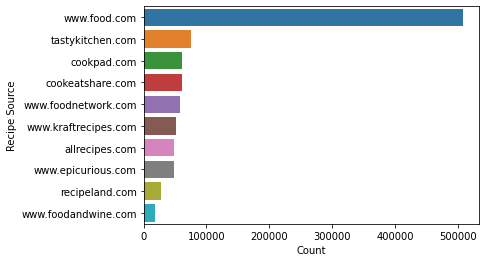

In [98]:
sns.barplot(y="Recipe Source", x="Count", data=recipe_source_df[0:10])


### Common Words in Recipe Titles

In [69]:
recipe_names = [i['title'] for i in data]
recipe_names[-10:]

['Spicy Steak Fajitas - Mexico',
 'Curried Asparagus Vichyssoise',
 "Sunny's Fake Crepes",
 'Devil Eggs',
 'Salvation Army Doughnuts',
 'Baumkuchen -- the King of Cakes!',
 'Extremely Easy and Quick - Namul Daikon Salad',
 'Pan-Roasted Pork Chops With Apple Fritters',
 'Polpette in Spicy Tomato Sauce',
 'Mexican-Style Sweetened Black Coffee (Cafe de Olla)']

In [67]:
title_words = []
for i,r in df.iterrows():
    title_words.append(r['title'].split(' '))
title_words = [item.lower() for sublist in title_words for item in sublist]
sorted(Counter(title_words).items(),key = lambda x:x[1], reverse=True)[:25]

NameError: name 'Counter' is not defined